<a href="https://colab.research.google.com/github/swapnil190301/EDA/blob/main/EXP5/DA_LAB_2019120037_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA ANALYTICS LAB EXPERIMENT 5: Classification: Text Analysis**

**Objective**: Separating Spam From Ham 

In [1]:
#importing all packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# **Problem 1: Loading the Dataset**

---



In [2]:
#reading the dataset
df = pd.read_csv('/content/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


Q1) Emails in the dataset?

In [3]:
len(df)

5728

Q2)  How many spam emails are in the dataset?

There are 1368 spam emails in the dataset 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


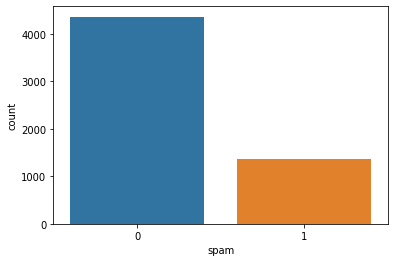

In [4]:
print('There are {} spam emails in the dataset '.format(len(df[df["spam"] == 1])))
sns.countplot(df['spam'])

From above we can say that, there are more non-spam emails as compared to spam emails

In [5]:
#knowing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
#removing duplicates
df = df.drop_duplicates()

Q: **Could a spam classifier potentially benefit from including the frequency of the word that appears in every email?**

Yes -- the number of times the word appears might help us differentiate spam from ham.

No -- the word appears in every email so this variable would not help us differentiate spam from ham.

It would definetely help in most of the cases, but in some cases where the word appears in both spam and ham emails,it won't help.

Q: **The nchar() function counts the number of characters in a piece of text. How many characters are in the longest email in the dataset (where longest is measured in terms of the maximum number of characters)?**

In [7]:
#text_length column shows us length of email
df['text_length'] = df['text'].apply(len)
maxlen = df["text_length"].max()
print("Maximum characters in an email in the dataset are: ")
print(maxlen)

Maximum characters in an email in the dataset are: 
43952


# **Problem 2.1**

---



1) Build a new corpus variable called corpus. 

In [8]:
corpus = pd.DataFrame()
corpus['text'] = df['text']
corpus['spam'] = df['spam']

2) Using tm_map, convert the text to lowercase. 

In [9]:
corpus['text'] = corpus['text'].apply(lambda x: x.lower())

3) Using tm_map, remove all punctuation from the corpus. 

In [10]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

def remove_punctuations(input_sentence):
    sentence_words_list_without_punctuations = tokenizer.tokenize(input_sentence)
    processed_string = ' '.join(sentence_words_list_without_punctuations)
    return processed_string

corpus['text'] = corpus['text'].map(remove_punctuations)

4) Using tm_map, remove all English stopwords from the corpus. 

In [11]:
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

5) Using tm_map, stem the words in the corpus. 

In [12]:
stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

Removing stop words

In [13]:
def remove_stopwords(sentence):
    modified_sentence = ' '.join([word for word in sentence.split() if word not in stopwords_dict])
    return modified_sentence
corpus['text'] = corpus['text'].apply(remove_stopwords)

In [14]:
corpus.head()

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject 4 color printing special request addit...,1
4,subject money get software cds software compat...,1


**Stemming the corpus:**
which is reducing a word to its dictionary root

In [15]:
ps = PorterStemmer()
def stem_words(sentence):
    modified_sentence = ' '.join([ps.stem(word) for word in sentence.split()])
    return modified_sentence

corpus['text'] = corpus['text'].apply(stem_words)
corpus.head()

,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsling fanni merril muzo...,1
2,subject unbeliev new home made easi im want sh...,1
3,subject 4 color print special request addit in...,1
4,subject money get softwar cd softwar compat gr...,1


6) Build a document term matrix from the corpus, called dtm

In [16]:
vectorizer = CountVectorizer()
dtm  = vectorizer.fit_transform(corpus['text'])
dtm.shape

(5695, 29222)

How many terms are in dtm?  
To obtain a more reasonable number of terms, limit dtm to contain terms appearing in at least 5% 
of documents, and store this result as spdtm (don't overwrite dtm, because we will use it in a later 
step of this homework). How many terms are in spdtm? 

In [17]:
print(f'Nnumber of terms in the document term matrix is {dtm.shape[1]}')
five_percent_vectorizer = CountVectorizer(min_df = 0.05)
five_percent_document_term_matrix = five_percent_vectorizer.fit_transform(corpus['text'])
print(f'Number of terms in the the five percent document term matrix is {five_percent_document_term_matrix.shape[1]}')

Nnumber of terms in the document term matrix is 29222
Number of terms in the the five percent document term matrix is 368


Creating the train and test data from document term matrix by splitting the train and test in the ratio 70:30

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dtm, corpus['spam'], test_size=0.3, random_state=46)

# **Problem 3.1**

---



**CART Model**

In [29]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
print(accuracy_score(clf.predict(X_test), y_test))

0.9514335868929198


The accuracy score as calculated above is 95%

In [31]:
print(confusion_matrix(clf.predict(X_test), y_test))

[[1256   41]
 [  42  370]]


From the above confusion matrix, we can interpret that


True Positive: 1256 emails were spam and we correctly classified them as spam 

False Positive: (Type 1 Error): 41 emails were interpreted as spam, but they are not actually spam

False Negative: (Type 2 Error): 42 emails were not spam, but they are spam actually

True Negative: 370 were not spam and we classified them correctly.

In [32]:
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1297
           1       0.90      0.90      0.90       412

    accuracy                           0.95      1709
   macro avg       0.93      0.93      0.93      1709
weighted avg       0.95      0.95      0.95      1709



The above report is a more detailed report which includes f1 score,recall and precision. 

 What is the training set AUC of spamCART?

In [33]:
print(roc_auc_score(clf.predict(X_test), y_test))

0.9332234207394211


**Random Forest**

In [24]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
score  = accuracy_score(random_forest_classifier.predict(X_test), y_test)

# **Problem 4.1**

---



In [34]:
print(f'The accuracy score using random forest algorithm is {score}')

The accuracy score using random forest algorithm is 0.9806904622586308


In [35]:
cnf = confusion_matrix(random_forest_classifier.predict(X_test), y_test)
print(f'Confusion matrix\n {cnf}')

Confusion matrix
 [[1296    9]
 [   2  402]]


From the above confusion matrix, we can interpret that


True Positive: 1296 emails were spam and we correctly classified them as spam 

False Positive: (Type 1 Error): 9 emails were interpreted as spam, but they are not actually spam

False Negative: (Type 2 Error): 2 emails were not spam, but they are spam actually

True Negative: 402 were not spam and we classified them correctly.

In [36]:
print(roc_auc_score(random_forest_classifier.predict(X_test), y_test))

0.9940764766131786


**OBSERVATION:**



*   The CART model had accuracy of 95.14%.
*   The CART model has an AUC score of 0.93.

*   The random forest model had accuracy of 98.06%.
*   The random forest model has an AUC score of 0.99.

**INFERENCE:**



*   Random forest model is better than CART model for classifying spam and ham emails. This had both better accuracy and AUC score.

*   I learnt to use tokenizer to remove punctuation marks.
*   I learnt to implement classifiers and measure their accuracy.